In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [4]:
import pandas as pd
import numpy as np

In [5]:
dir(mnist)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [6]:
X,y = mnist.data,mnist.target

In [7]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

### Klasyfikator Binarny

In [8]:
y_train_5 = (y_train == '5')
y_train_5.head(3)

0     True
1    False
2    False
Name: class, dtype: bool

Klasyfikator Stochastyczny spadku wzdłuż gradientu. Nadaje się on również do uczenia przyrostowego

In [9]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

Pomiar wydajności 

- metoda sprawdzianu krzyżowego

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3)

array([0.95035, 0.96035, 0.9604 ])

Lepszą miarą dokładności jest analiza macierzy pomyłek  
- confusion matrix

In [11]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

prawdziwie negatywne - PN  cm[0][0]  
fałszywie pozytywne  - FP  cm[0][1]  
fałszywie negatywne  - FN  cm[1][0]  
prawdziwie pozytywne - PP  cm[1][1]  

Równanie na prezycję klasyfikatora:  
Precyzja = PP / ( PP + FP )  

Równanie na pełność klasyfikatora:  
Pełność = PP / ( PP + FN )

In [13]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [14]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

To znaczy, że gdy klasyfikatro uznaje, że rozpoznaje cyfrę 5, ma 83,7% dokładności  
A prawidłowo rozpoznaje jedynie 65,1% piątek

Aby połączyć precyzję i pełność w jednym wskaźniku, łączy się je za pomocą średniej harmonicznej.  
Powstaje wtedy wskaźnik F1:   
F1 = PP / ( PP + ( FN + FP)/2 )

In [15]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343847

Wynik F1 faworyzuje klasyfikatory mające zbliżone wartości precyzji i pełności.   
Czasami jednak chcemy, aby klasyfikator miał np 30% precyzji i 99% pełności, albo na odwrót

In [16]:
some_digit = X.iloc[0:1].to_numpy()

In [17]:
y_scores = sgd_clf.decision_function(some_digit)
y_scores

e:\ML & Data\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [18]:
threeshold = 0
y_some_digit_pred = (y_scores > threeshold)
y_some_digit_pred

threeshold = 3000 
y_some_digit_pred = (y_scores > threeshold)
y_some_digit_pred

array([False])

Aby dobrać próg pomiędzy pełnością, a precyzją należy uzyskać wyniki funkcji decyzyjnej wszystkich przykładów zestawu uczącego,   
zaznaczając że nie chcemy uzyskać prognoz, tylko wyniki decyzyjne

In [19]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

można teraz wyliczyć precyzję i pełnośc dla wszystkich możliwych progów za pomocą precision_recall_curve

In [20]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

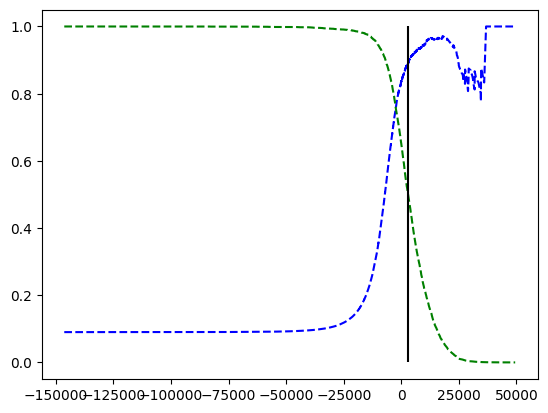

In [21]:
from matplotlib import pyplot as plt
plt.plot(thresholds,precisions[:-1],'b--',label="Precyzja")
plt.plot(thresholds,recalls[:-1],'g--',label='Czułość')
plt.vlines(threeshold,0,1.0,'k',label="próg")

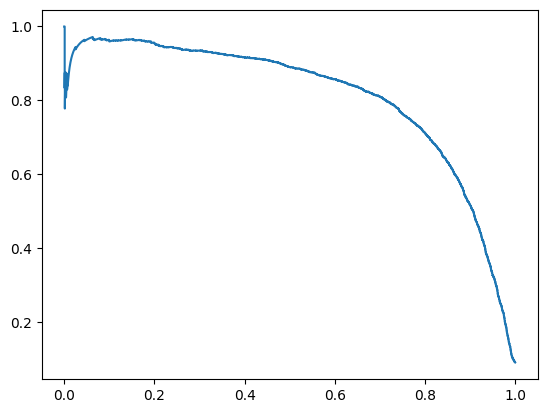

In [22]:
plt.plot(recalls,precisions)

In [23]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [24]:
y_probas_forest = cross_val_predict(forest_clf, X_train,y_train_5,cv=3,method='predict_proba')

In [25]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

### Klasyfikacja wieloklasowa

In [26]:
from sklearn.svm import SVC

In [27]:
svm_clf = SVC(random_state=42)
svm_clf.fit( X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [28]:
svm_clf.predict(some_digit)

e:\ML & Data\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['5'], dtype=object)

In [29]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [30]:
svm_clf.classes_[5]

'5'

In [31]:
from sklearn.linear_model import SGDRegressor

SGD - simple gradient descend

In [32]:
sgf_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None,eta0=0.01,n_iter_no_change=100,random_state=42)